In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
 
 #From updated functions.py from Canvas. Changed names on functions from previous version.
 
def softmax(x):
    """ Standard definition of the softmax function """
    return np.exp(x) / np.sum(np.exp(x), axis=0)


 
 
def LoadBatch(filename):
    """ Copied from the dataset website """
    with open('Datasets/' + filename, 'rb') as fo:
        dataset_dict = pickle.load(fo, encoding='bytes')
 
    return dataset_dict
 
 
def ComputeGradsNum(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    c = ComputeCost(X, Y, W, b, lamda)
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
        grad_b[i] = (c2 - c) / h
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
            grad_w[i, j] = (c2 - c) / h
 
    return [grad_w, grad_b]
 
 
def ComputeGradsNumSlow(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] -= h
        c1 = ComputeCost(X, Y, W, b_try, lamda)
 
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
 
        grad_b[i] = (c2 - c1) / (2 * h)
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] -= h
            c1 = ComputeCost(X, Y, w_try, b, lamda)
 
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
 
            grad_w[i, j] = (c2 - c1) / (2 * h)
 
    return [grad_w, grad_b]
 
 
def montage(W):
    """ Display the image for each label in W """
    fig, ax = plt.subplots(2, 5)
    for i in range(2):
        for j in range(5):
            im = W[i * 5 + j, :].reshape(32, 32, 3, order='F')
            sim = (im - np.min(im[:])) / (np.max(im[:]) - np.min(im[:]))
            sim = sim.transpose(1, 0, 2)
            ax[i][j].imshow(sim, interpolation='nearest')
            ax[i][j].set_title("y=" + str(5 * i + j))
            ax[i][j].axis('off')
    plt.show()
 
 
def save_as_mat(data, name="model"):
    """ Used to transfer a python model to matlab """
    import scipy.io as sio
    sio.savemat(f'{name}.mat', {"name": "b"})




In [2]:

def load(filename):
    data = LoadBatch(filename)
    
    X = data[b'data'].astype(np.float32).reshape(-1, 3072).T / 255
    y = np.array(data[b'labels']).astype(np.int32)
    
    Y = np.zeros((10, y.shape[0]), dtype=np.float32)
    for i, label in enumerate(y):
        Y[label, i] = 1
    
    return X, Y, y + 1

def normalize_data(trainX, X):
    mean_X = np.mean(trainX, axis=1, keepdims=True)
    std_X = np.std(trainX, axis=1, keepdims=True)
    
    normalized_X = (X - mean_X) / std_X
    
    return normalized_X

# Exercise 2.1
train_X, train_Y, train_y = load('data_batch_1')
val_X, val_Y, val_y = load('data_batch_2')
test_X, test_Y, test_y = load('test_batch')

trainX_norm = normalize_data(train_X, train_X)
valX_norm = normalize_data(train_X, val_X)
testX_norm = normalize_data(train_X, test_X)

# Set the number of nodes in the hidden layer
m = 50


In [3]:
def initialize_parameters(K, d, m):
    W1 = np.random.randn(m, d) * (1 / np.sqrt(d))
    b1 = np.zeros((m, 1))
    W2 = np.random.randn(K, m) * (1 / np.sqrt(m))
    b2 = np.zeros((K, 1))
    return W1, b1, W2, b2

W1, b1, W2, b2 = initialize_parameters(10, 3072, m)



# Implement the forward pass for the 2-layer neural network

def forward_pass(X, W1, b1, W2, b2):
    s1 = np.dot(W1, X) + b1
    H = np.maximum(0, s1)
    s = np.dot(W2, H) + b2
    P = softmax(s)
    return H,P





In [4]:
# Exercise 2.2

def compute_cost(X, Y, W1, b1, W2, b2, lambda_):
    _, P = forward_pass(X, W1, b1, W2, b2)
    loss = -np.mean(np.sum(Y * np.log(P), axis=0))
    reg = lambda_ * (np.sum(W1 * W1) + np.sum(W2 * W2))

    cost = loss + reg

    return cost, loss

def compute_accuracy(X, y, W1, b1, W2, b2):
    # Compute the scores
    _, P = forward_pass(X, W1, b1, W2, b2)

    # Compute the predicted labels
    y_pred = np.argmax(P, axis=0) + 1

    # Compute the accuracy
    accuracy = np.mean(y == y_pred)

    return accuracy



def compute_gradients_num_slow(X,Y, W1, b1, W2, b2, lambda_, h):
    grad_W1 = np.zeros(W1.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_W2 = np.zeros(W2.shape)
    grad_b2 = np.zeros(b2.shape)


    #W1
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1_ = np.array(W1)
            W1_[i,j] -= h
            c1 = compute_cost(X, Y, W1_, b1, W2, b2, lambda_)[0]
            
            W1_ = np.array(W1)
            W1_[i,j] += h
            c2 = compute_cost(X, Y, W1_, b1, W2, b2, lambda_)[0]
            grad_W1[i,j] = (c2 - c1) / (2*h)

    #b1
    for i in range(len(b1)):
        b1_ = np.array(b1)
        b1_[i] -= h
        c1 = compute_cost(X, Y, W1, b1_, W2, b2, lambda_)[0]
            
        b1_ = np.array(b1)
        b1_[i] += h
        c2 = compute_cost(X, Y, W1, b1_, W2, b2, lambda_)[0]
        grad_b1[i] = (c2 - c1) / (2*h)


    #W2
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2_ = np.array(W2)
            W2_[i,j] -= h
            c1 = compute_cost(X, Y, W1, b1, W2_, b2, lambda_)[0]
            
            W2_ = np.array(W2)
            W2_[i,j] += h
            c2 = compute_cost(X, Y, W1, b1, W2_, b2, lambda_)[0]
            grad_W2[i,j] = (c2 - c1) / (2*h)
    
    #b2
    for i in range(len(b2)):
        b2_ = np.array(b2)
        b2_[i] -= h
        c1 = compute_cost(X, Y, W1, b1, W2, b2_, lambda_)[0]
            
        b2_ = np.array(b2)
        b2_[i] += h
        c2 = compute_cost(X, Y, W1, b1, W2, b2_, lambda_)[0]
        grad_b2[i] = (c2 - c1) / (2*h)

    return grad_W1, grad_b1, grad_W2, grad_b2



def compute_gradients_num(X, Y, W1, b1, W2, b2, lambda_, h):
    grad_w1 = np.zeros(W1.shape)
    grad_w2 = np.zeros(W2.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_b2 = np.zeros(b2.shape)

    c = compute_cost(X, Y, W1, b1, W2, b2, lambda_)[0]

   #W1
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1_ = np.array(W1)
            W1_[i, j] += h
            c2 = compute_cost(X, Y, W1_, b1, W2, b2, lambda_)[0]
            grad_w1[i, j] = (c2 - c) / h

    #b1
    for i in range(len(b1)):
        b1_ = np.array(b1)
        b1_[i] += h
        c2 = compute_cost(X, Y, W1, b1_, W2, b2, lambda_)[0]
        grad_b1[i] = (c2 - c) / h


    #W2
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2_ = np.array(W1)
            W2[i, j] += h
            c2 = compute_cost(X, Y, W1, b1, W2_, b2, lambda_)[0]
            grad_w2[i, j] = (c2 - c) / h

    
    #b2
    for i in range(len(b2)):
        b2_ = np.array(b2)
        b2_[i] += h
        c2 = compute_cost(X, Y, W1, b1, W2, b2_, lambda_)[0]
        grad_b2[i] = (c2 - c) / h

    return grad_w1, grad_b1, grad_w2, grad_b2

def compute_gradients(X, Y, W1, b1, W2, b2, lambda_):
    H, P = forward_pass(X, W1, b1, W2, b2)
    N = X.shape[1]
    
    g = P - Y
    grad_W2 = (1 / N) * np.dot(g, H.T) + 2 * lambda_ * W2
    grad_b2 = (1 / N) * np.sum(g, axis=1, keepdims=True)

    g = np.dot(W2.T, g)
    g[H <= 0] = 0
    
    grad_W1 = (1 / N) * np.dot(g, X.T) + 2 * lambda_ * W1
    grad_b1 = (1 / N) * np.sum(g, axis=1, keepdims=True)
    return grad_W1, grad_b1, grad_W2, grad_b2


n =  2 lambda =  0
Relative error for W1: 1.0970848849553784e-10
Relative error for b1: 9.045184232555032e-11
Relative error for W2: 3.7077854779821903e-11
Relative error for b2: 2.488125174790643e-11
n =  10 lambda =  0
Relative error for W1: 2.663916595066741e-10
Relative error for b1: 3.168288495285555e-10
Relative error for W2: 1.2410268240497473e-10
Relative error for b2: 8.068702710931117e-11
n =  10 lambda =  0.5
Relative error for W1: 3.1623766952711315e-09
Relative error for b1: 2.61680902401904e-09
Relative error for W2: 5.544363502670165e-10
Relative error for b2: 6.28398618947798e-10
Sanity check: training the network on a small subset of the training data


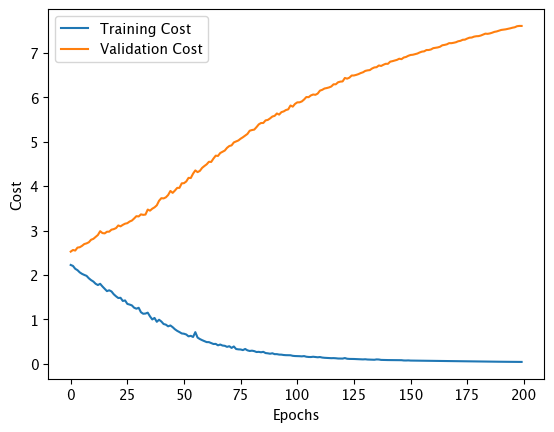

Final training cost: 0.042008264033529835
Final validation cost 7.604227997551875


In [200]:


def train_network(X, Y, X_val, Y_val, W1, b1, W2, b2, lambda_, n_batch, eta, n_epochs):
    n = X.shape[1]
    train_costs = []
    val_costs = []
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(n)
        for j in range(0, n, n_batch):
            j_start = j
            j_end = j + n_batch
            idx = shuffled_indices[j_start:j_end]
            X_batch = X[:, idx]
            Y_batch = Y[:, idx]
            grad_W1, grad_b1, grad_W2, grad_b2 = compute_gradients(X_batch, Y_batch, W1, b1, W2, b2, lambda_)

            W1 -= eta * grad_W1
            b1 -= eta * grad_b1
            W2 -= eta * grad_W2
            b2 -= eta * grad_b2

        cost_train, _ = compute_cost(X, Y, W1, b1, W2, b2, lambda_)
        cost_val, _ = compute_cost(X_val, Y_val, W1, b1, W2, b2, lambda_)
        train_costs.append(cost_train)
        val_costs.append(cost_val)


  # Plot the training and validation cost
    plt.plot(train_costs, label='Training Cost')
    plt.plot(val_costs, label='Validation Cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

    # Check the final training cost
    print("Final training cost:", train_costs[-1])
    print('Final validation cost', val_costs[-1])

    return W1, b1, W2, b2, train_costs, val_costs


#Relative error check
nn = [2, 10, 10]
lambdas = [0, 0, 0.5]
for i in range(len(nn)):

    X_sample = trainX_norm[:, :nn[i]]
    Y_sample = train_Y[:, :nn[i]]
    # Compute the analytical gradients
    grad_W1_analytical, grad_b1_analytical, grad_W2_analytical, grad_b2_analytical = compute_gradients(X_sample, Y_sample, W1, b1, W2, b2, lambdas[i]) 

    # Compute the numerical gradients
    #grad_W1_num, grad_b1_num, grad_W2_num, grad_b2_num = compute_grads_num(X_sample, Y_sample, W1, b1, W2, b2, lamda, h=1e-5)
    # or
    grad_W1_num, grad_b1_num, grad_W2_num, grad_b2_num = compute_gradients_num_slow(X_sample, Y_sample, W1, b1, W2, b2, lambdas[i], h=1e-5)


    W_analytical = [grad_W1_analytical, grad_W2_analytical]
    W_num = [grad_W1_num, grad_W2_num]
    b_analytical = [grad_b1_analytical, grad_b2_analytical]
    b_num = [grad_b1_num, grad_b2_num]


    print("n = ", nn[i], "lambda = ", lambdas[i])

    print("Relative error for W1:", np.linalg.norm(grad_W1_analytical - grad_W1_num) / max(1e-6, np.linalg.norm(grad_W1_analytical) + np.linalg.norm(grad_W1_num)))
    print("Relative error for b1:", np.linalg.norm(grad_b1_analytical - grad_b1_num) / max(1e-6, np.linalg.norm(grad_b1_analytical) + np.linalg.norm(grad_b1_num)))
    print("Relative error for W2:", np.linalg.norm(grad_W2_analytical - grad_W2_num) / max(1e-6, np.linalg.norm(grad_W2_analytical) + np.linalg.norm(grad_W2_num)))
    print("Relative error for b2:", np.linalg.norm(grad_b2_analytical - grad_b2_num) / max(1e-6, np.linalg.norm(grad_b2_analytical) + np.linalg.norm(grad_b2_num)))




def sanity_check():
    np.random.seed(123)
    N = 100
    n_epochs = 200
    n_batch = 10
    eta = 0.01
    lambda_ = 0
    d = trainX_norm.shape[0]
    m = 50
    K = train_Y.shape[0]

    X_small = train_X[:, :N]
    Y_small = train_Y[:, :N]

    W1, b1, W2, b2 = initialize_parameters(K,d,m)

    print("Sanity check: training the network on a small subset of the training data")
    train_network(X_small, Y_small, valX_norm, val_Y, W1, b1, W2, b2, lambda_, n_batch, eta, n_epochs)



sanity_check()


Epoch 1/500: Test accuracy: 0.2519
Epoch 2/500: Test accuracy: 0.2781
Epoch 3/500: Test accuracy: 0.2180
Epoch 4/500: Test accuracy: 0.2321
Epoch 5/500: Test accuracy: 0.2023
Epoch 6/500: Test accuracy: 0.2340
Epoch 7/500: Test accuracy: 0.2453
Epoch 8/500: Test accuracy: 0.2492
Epoch 9/500: Test accuracy: 0.2171
Epoch 10/500: Test accuracy: 0.2575
Epoch 11/500: Test accuracy: 0.2455
Epoch 12/500: Test accuracy: 0.2264
Epoch 13/500: Test accuracy: 0.2176
Epoch 14/500: Test accuracy: 0.2242
Epoch 15/500: Test accuracy: 0.1506
Epoch 16/500: Test accuracy: 0.2183
Epoch 17/500: Test accuracy: 0.2647
Epoch 18/500: Test accuracy: 0.2115
Epoch 19/500: Test accuracy: 0.2363
Epoch 20/500: Test accuracy: 0.2401
Epoch 21/500: Test accuracy: 0.2241
Epoch 22/500: Test accuracy: 0.2215
Epoch 23/500: Test accuracy: 0.2247
Epoch 24/500: Test accuracy: 0.2143
Epoch 25/500: Test accuracy: 0.1323
Epoch 26/500: Test accuracy: 0.2450
Epoch 27/500: Test accuracy: 0.2511
Epoch 28/500: Test accuracy: 0.2093
E

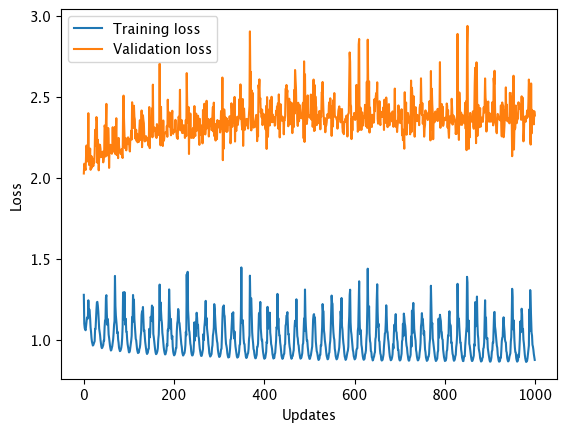

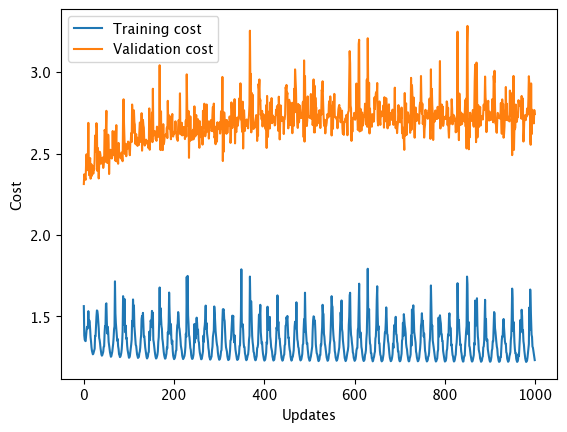

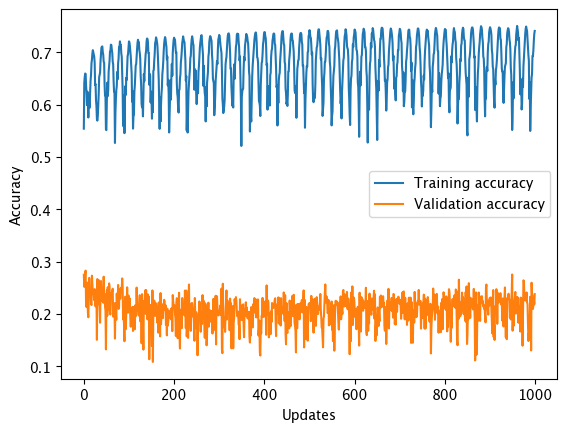

Final training loss: 0.8752735911590406


In [7]:
# Assignment 2.3

# Implement the 2-layer neural network mini-batch gradient descent
def train_network_cyclical(X_train, Y_train, X_val, Y_val, W1, b1, W2, b2, lambda_, n_batch, eta_min, eta_max, n_s, n_epochs, y_train, y_val, X_test, y_test):
    N = X_train.shape[1]
    train_losses = []
    val_losses = []
    train_costs = []
    val_costs = []

    test_accs = []
    train_accs = []

    t = 0
    eta_history = []
    update_step_history = []

    plot_interval = n_s // 10


    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(N)
        for j in range(0, N, n_batch):
            t = t % (2 * n_s)  
            if t <= n_s:
                eta = eta_min + (t / n_s) * (eta_max - eta_min)
            else:
                eta = eta_max - ((t - n_s) / n_s) * (eta_max - eta_min)

            j_start = j
            j_end = j + n_batch
            idx = shuffled_indices[j_start:j_end]
            X_batch = X_train[:, idx]
            Y_batch = Y_train[:, idx]
            grad_W1, grad_b1, grad_W2, grad_b2 = compute_gradients(X_batch, Y_batch, W1, b1, W2, b2, lambda_)

            W1 -= eta * grad_W1
            b1 -= eta * grad_b1
            W2 -= eta * grad_W2
            b2 -= eta * grad_b2

            eta_history.append(eta)
            update_step_history.append(j)

            # Calculate and store the costs at every update step
            if t % plot_interval == 0:

                cost_train, _ = compute_cost(X_train, Y_train, W1, b1, W2, b2, lambda_)
                cost_val, _= compute_cost(X_val, Y_val, W1, b1, W2, b2, lambda_)
                train_costs.append(cost_train)
                val_costs.append(cost_val)

                _, loss_train = compute_cost(X_train, Y_train, W1, b1, W2, b2, lambda_)
                _, loss_val = compute_cost(X_val, Y_val, W1, b1, W2, b2, lambda_)
                train_losses.append(loss_train)
                val_losses.append(loss_val)


                train_accuracy = compute_accuracy(X_train, y_train, W1, b1, W2, b2)
                train_accs.append(train_accuracy)
                test_accuracy = compute_accuracy(X_test, y_test, W1, b1, W2, b2)
                test_accs.append(test_accuracy)

            t += 1




    
        print("Epoch {}/{}: Test accuracy: {:.4f}".format(epoch + 1, n_epochs, test_accuracy))
        #print("Epoch {}/{}: Val accuracy: {:.4f}".format(epoch + 1, n_epochs, train_accuracy))
    return W1, b1, W2, b2, train_losses, val_losses, train_costs, val_costs, train_accs, test_accs, eta_history, update_step_history


# Set parameters for gradient descent
n = trainX_norm.shape[1]
n_batch = 100
eta_min = 1e-5
eta_max = 1e-1
n_s = 500
#n_s = 2 * (n // n_batch)
n_epochs = n_s
lambda_ = 0.01


W1, b1, W2, b2, train_losses, val_losses, train_costs, val_costs, train_accs, test_accs,  eta_history, update_step_history = train_network_cyclical(
    trainX_norm, train_Y, val_X, val_Y, W1, b1, W2, b2, lambda_, n_batch, eta_min, eta_max, n_s, n_epochs, train_y, val_y, test_X, test_y)



plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Plot the training and validation cost
plt.plot(train_costs, label='Training cost')
plt.plot(val_costs, label='Validation cost')
plt.xlabel('Updates')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_accs, label='Training accuracy')
plt.plot(test_accs, label='Validation accuracy')
plt.xlabel('Updates')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Print the final training loss
print("Final training loss:", train_losses[-1])



In [209]:
# Print the final accuracy
print("Final test accuracy:", test_accs[-1])



Final test accuracy: 0.1856
10000
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
100.0


In [202]:
# Assignment 2.4

def relative_error(ga, gn, eps=1e-10):
    numerator = np.abs(ga - gn)
    denominator = np.maximum(eps, np.abs(ga) + np.abs(gn))
    return numerator / denominator

train_X, train_Y, train_y = load("data_batch_1")
train_X2, train_Y2, train_y2 = load("data_batch_2")
train_X3, train_Y3, train_y3 = load("data_batch_3")
train_X4, train_Y4, train_y4 = load("data_batch_4")
train_X5, train_Y5, train_y5 = load("data_batch_5")
test_X, test_Y, test_y = load("test_batch")

trX_4=np.hstack((train_X,train_X2,train_X3,train_X4,train_X5))
trY_4=np.hstack((train_Y,train_Y2,train_Y3,train_Y4,train_Y5))
try_4=np.hstack((train_y,train_y2,train_y3,train_y4,train_y5))

Xva=trX_4[0:,0:1000]
Yva=trY_4[0:,0:1000]
yva=try_4[0:1000]
Xtr=trX_4[0:,1000:]
Ytr=trY_4[0:,1000:]
ytr=try_4[1000:]


X_train_norm = normalize_data(Xtr, Xtr)
X_val_norm = normalize_data(Xtr, Xva)
X_test_norm = normalize_data(Xtr, test_X)

n_epochs = 10
eta = 0.01
n_batch = 100
lambda_ = 0.01

d = X_train_norm.shape[0]
m = 50
K = train_Y.shape[0]

W1, b1, W2, b2 = initialize_parameters(K, d, m)

n = X_train_norm.shape[1]
n_s = 2 * (n // n_batch)

W1_trained, b1_trained, W2_trained, b2_trained, loss_train_history, loss_val_history, cost_train_history, cost_val_history, test_accuracy_history, train_accuracy_history,  eta_history, update_step_history= train_network_cyclical(
    X_train_norm, Ytr, X_val_norm, Yva, W1, b1, W2, b2, lambda_, n_batch, eta_min, eta_max, n_s, n_epochs, ytr, yva, X_test_norm, test_y)



Epoch 1/10: Test accuracy: 0.4179
Epoch 2/10: Test accuracy: 0.4270
Epoch 3/10: Test accuracy: 0.4525
Epoch 4/10: Test accuracy: 0.5003
Epoch 5/10: Test accuracy: 0.4802
Epoch 6/10: Test accuracy: 0.4324
Epoch 7/10: Test accuracy: 0.4794
Epoch 8/10: Test accuracy: 0.5113
Epoch 9/10: Test accuracy: 0.4835
Epoch 10/10: Test accuracy: 0.4248


Cost lists
100
100


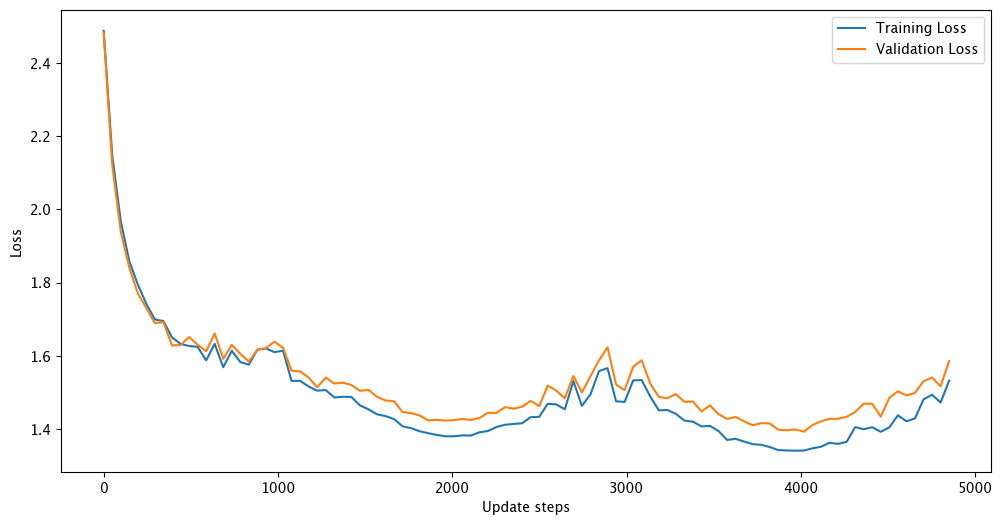

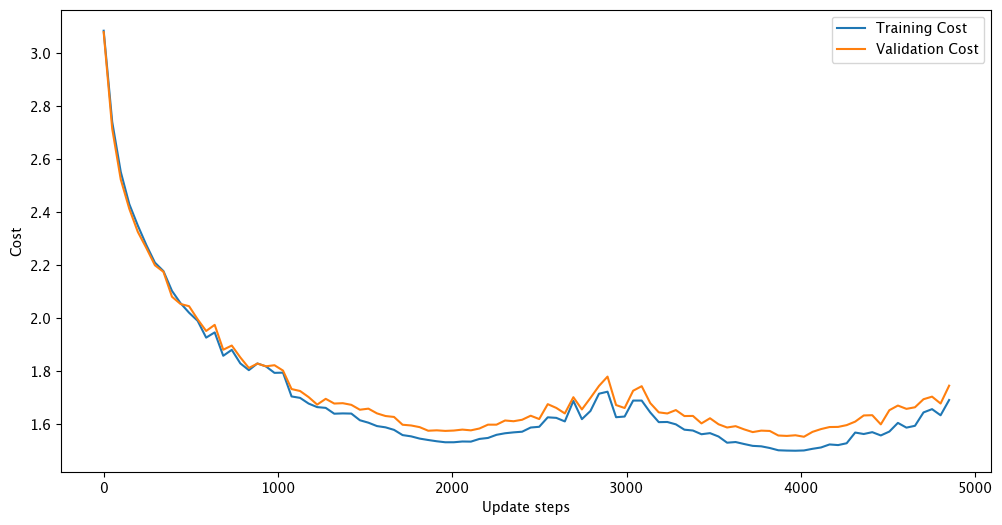

accuracy list
100
100
100


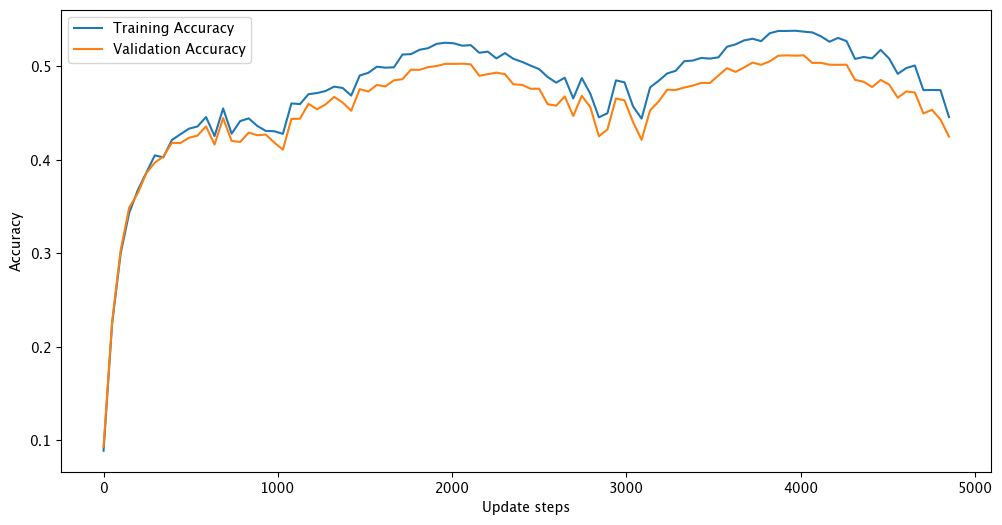

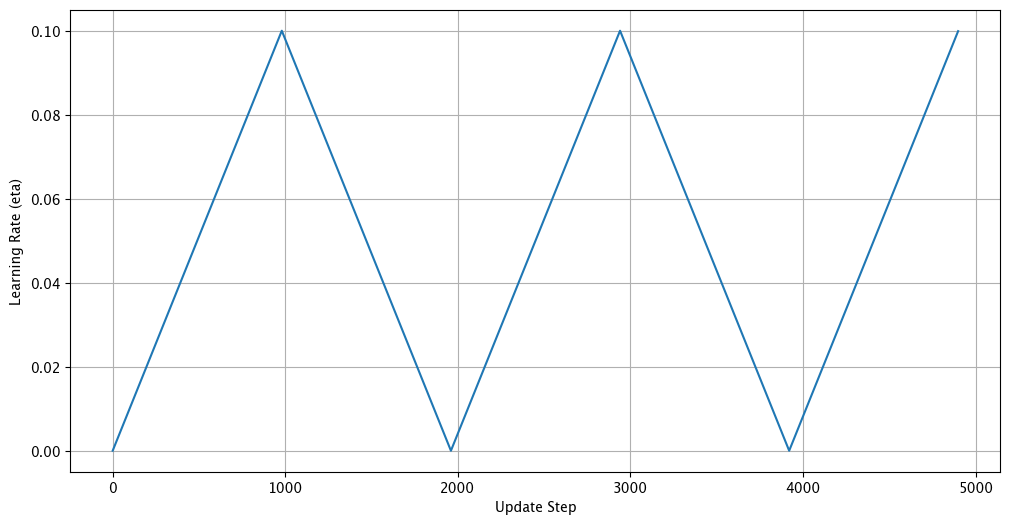

In [203]:

print('Cost lists')
print(len(cost_train_history))
print(len(cost_val_history))

def plot_loss(loss_train_history, loss_val_history):

    plt.figure(figsize=(12, 6))
    x_values = [i * 49 for i in range(len(loss_train_history))]
    plt.plot(x_values, loss_train_history, label='Training Loss')
    plt.plot(x_values, loss_val_history, label='Validation Loss')
    plt.xlabel('Update steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_cost(cost_train_history, cost_val_history):
    plt.figure(figsize=(12, 6))
    x_values = [i * 49 for i in range(len(cost_train_history))]
    plt.plot(x_values, cost_train_history, label='Training Cost')
    plt.plot(x_values, cost_val_history, label='Validation Cost')
    plt.xlabel('Update steps')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

def plot_accuracy(test_accuracy_history, train_accuracy_history):
    plt.figure(figsize=(12, 6))
    x_values = [i * 49 for i in range(len(test_accuracy_history))]
    print('accuracy list')
    print(len(x_values))
    print(len(test_accuracy_history))
    print(len(train_accuracy_history))
    plt.plot(x_values, test_accuracy_history, label='Training Accuracy')
    plt.plot(x_values, train_accuracy_history, label='Validation Accuracy')
    plt.xlabel('Update steps')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_eta(eta_history, update_step_history):
    plt.figure(figsize=(12, 6))
    x_values = [i for i in range(len(update_step_history))]
    plt.plot(x_values, eta_history)
    plt.xlabel('Update Step')
    plt.ylabel('Learning Rate (eta)')
    plt.grid(True)
    plt.show()

plot_loss(loss_train_history, loss_val_history)
plot_cost(cost_train_history, cost_val_history)
plot_accuracy(test_accuracy_history, train_accuracy_history)
plot_eta(eta_history, update_step_history)
# Check the final training loss


In [204]:
import random


def random_search(train_X, train_Y, train_y, val_X, val_Y, y_val,X_test_norm, test_y, W1, b1, W2, b2, n_batch, eta_min, eta_max, n_s,
                  n_epochs, n_lambda, lambda_range):
    results = []

    for i in range(n_lambda):
        lambda_val = random.uniform(lambda_range[0], lambda_range[1])
        print("Lambda {}: {:.10f}".format(i + 1, lambda_val))

        W1_opt, b1_opt, W2_opt, b2_opt, loss_train_history, loss_val_history, cost_train_history, cost_val_history, train_accuracy_history, test_accuracy_history,  eta_history, update_step_history = train_network_cyclical(
            train_X, train_Y, val_X, val_Y, W1, b1, W2, b2, lambda_, n_batch, eta_min, eta_max, n_s, n_epochs, train_y, y_val, X_test_norm, test_y)


        results.append((lambda_val, cost_val_history[-1], test_accuracy_history[-1]))
        print(
            "Validation accuracy: {:.4f}\n".format(test_accuracy_history[-1]))

    return sorted(results, key=lambda x: x[2], reverse=True)  # sort by test accuracy


# Perform random search for lambda
n_lambda = 8  # number of lambda values to try
lambda_range = (1e-5, 1e-2)
n_epochs = 30

print('Lambda range: ')
print(lambda_range[0])
print(lambda_range[1])

# Random search
results = random_search(
    X_train_norm, Ytr, ytr,
    X_val_norm, Yva, yva,
    X_test_norm, test_y,
    W1, b1, W2, b2, n_batch, eta_min, eta_max, n_s, n_epochs, n_lambda, lambda_range)

# Print results
print("Random search results:")
for r in results:
    print("Lambda: {:.10f}, Validation cost: {:.4f}, Test accuracy: {:.4f}".format(r[0], r[1], r[2]))



Lambda range: 
1e-05
0.01
Lambda 1: 0.0051994503
Epoch 1/30: Test accuracy: 0.4930
Epoch 2/30: Test accuracy: 0.4425
Epoch 3/30: Test accuracy: 0.4899
Epoch 4/30: Test accuracy: 0.5107
Epoch 5/30: Test accuracy: 0.4865
Epoch 6/30: Test accuracy: 0.4497
Epoch 7/30: Test accuracy: 0.4774
Epoch 8/30: Test accuracy: 0.5111
Epoch 9/30: Test accuracy: 0.4955
Epoch 10/30: Test accuracy: 0.4369
Epoch 11/30: Test accuracy: 0.4851
Epoch 12/30: Test accuracy: 0.5148
Epoch 13/30: Test accuracy: 0.4974
Epoch 14/30: Test accuracy: 0.4539
Epoch 15/30: Test accuracy: 0.4749
Epoch 16/30: Test accuracy: 0.5140
Epoch 17/30: Test accuracy: 0.4799
Epoch 18/30: Test accuracy: 0.4642
Epoch 19/30: Test accuracy: 0.4818
Epoch 20/30: Test accuracy: 0.5135
Epoch 21/30: Test accuracy: 0.4889
Epoch 22/30: Test accuracy: 0.4562
Epoch 23/30: Test accuracy: 0.4849
Epoch 24/30: Test accuracy: 0.5135
Epoch 25/30: Test accuracy: 0.5013
Epoch 26/30: Test accuracy: 0.4403
Epoch 27/30: Test accuracy: 0.4907
Epoch 28/30: Te